# AC221 Final Project - Predictive Policing  and Its Ethical Concerns
***
**APCOMP 221: Critical Thinking in Data Science **   
Zihao Xu & Liyang Zhao  
2020 Spring

# Abstract
In this project, we explored the topic of Predictive policing and its ethical concerns. We have built several predictive policing models to forecast the number of crimes across time and location in the city of San Francisco. Further, we also performed a simulation study to show the potential danger of misusing such models.

The following document will include code embedded with explanation to show our critical thinking. 
- Section 1: Background and Ethical Concerns of Predictive Policing
- Section 2: Dataset and Exploratory Analysis
- Section 3: Building a Predictive Policing Model
- Section 4: Simulation Study
- Section 5: Conclusion and Recommendation

Here is a [link](https://docs.google.com/presentation/d/1Qok6YgQ_m76p0Q2FDzlG_pj83_OX89PMwm0FPzPQOtw/edit?usp=sharing) to our presentation.

# Section 1: Background and Ethical Concerns of Predictive Policing

### A Formal Definition

According to the RAND Corporation, predictive policing is defined as   
“the application of analytical techniques – particularly quantitative techniques – to identify likely targets for police intervention and prevent crime or solve past crimes by making statistical predictions.”

We can summarize the process of predictive policing into 4 stages, starting from collecting data on past criminal avtivities, to training models to make predictions on crimes, to informing policing activities, and finally, to receiving the adversarial response from the criminals and gathering more criminal records for the database. The plot below summarizes the four stages.

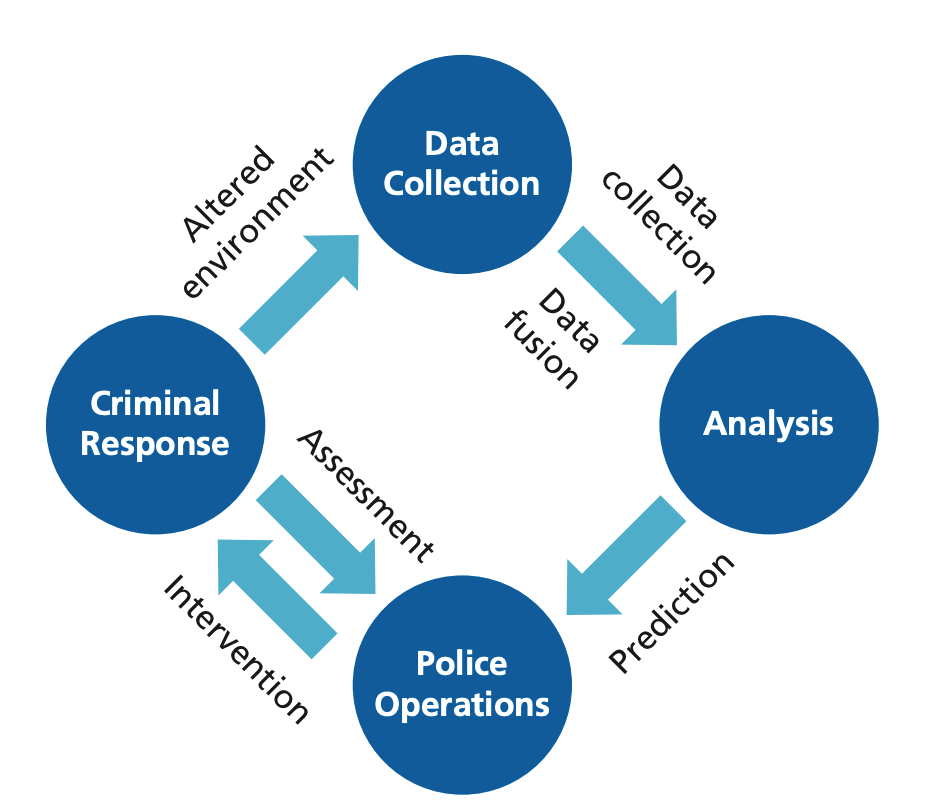

In [4]:
from IPython.display import display
from PIL import Image
display(Image.open("images/4-stage.png"))

It is very important to note that, aside from the data collection and modeling part, the third and fourth stages of the entire predictive policing process involves human decision on how the predictions are interpreted and used. If the police department do not set well-thoughout ways of using such predictions, there is still room for potential human bias and mis-allocation of limited police resouces, which defeats the whole purpose of using such systems in the first place.

### Potential Usage of Predictive Policing

In general, there are 4 types of usage of predictive policing systems, including
1. Methods for predicting crimes: These are approaches used to forecast places and times with an increased risk of crime.
2. Methods for predicting offenders: These approaches identify individuals at risk of offending in the future.
3. Methods for predicting perpetrators’ identities: These techniques are used to create profiles that accurately match likely offenders with specific past crimes.
4. Methods for predicting victims of crimes: Similar to those methods that focus on offenders, crime locations, and times of heightened risk, these approaches are used to identify groups or, in some cases, individuals who are likely to become victims of crime.

Other analytical tools also involve patrol route optimization, criminal acativity analytics (dashborads with visualizations), and etc. 

One good example of predictive policing tool is called Predpol. Designed by Dr. Jeff Brantingham at UCLA, PredPol is a data-driven platform that predicts where and when specific crimes are most likely to occur. Its predcions are used to direct patrol operations in the field, while the platform can also be used to analyze daily patrol patterns and their effectiveness. In February 2019, Vice reported that many police departments across the U.S. are secretly experimenting with PredPol. 

### Pros and Cons of Predictive Policing Tools

We can see that such predictive models have several advantages:
- Analytical abilities of such systems allow the officiers to search through information in large databases in a more efficient manner. 
- With advanced visualization techniques, crime analysts are able to more directly detect patterns or crime networks within crinimal records。
- Also, If properly used, these systems can optimize existing policing activities and better inform allocation of limited policing resources.  

However, such tools also raise some serious ethical concerns. 
- Firstly, it makes us rethink what consititues unlawful search and seizure and raises the need to redefine “reasonable suspicion”. It is unclear whether "being forecast to be involved in violent crimes" is sufficient to warrant a search by the police. In addition, although the U.S. Supreme Court has ruled that standards for what constitutes reasonable suspicion are relaxed in “high-crime areas”, the definition of a “high-crime” area remains unclear and is up to intrepretation.
- Secondly, much like the case with COMPAS, these predictive models are oftentimes blackboxes due to propertiary reasons. It is hard for the public, especially those that are effected by the algorithms, to know how the models were built and whether these models target specific groups or neighborhood more than others.

- Thirdly, the dataset used to train such models might represent human bias towards race, ethnicity and socioeconomic status in past policing activities.
- And finally, differences in levels of community trust in police and the desired amount of local policing  may lead to higher of lower crime reporting rates.

It is important to realize that the third and fourth points show the potential for dataset bias. Therefore, even with the most accurate machine learning models, predictions made based on such biased data sets will only reproduce the patterns and exacerbate existing biases.

# Section 2: Dataset and Exploratory Analysis

In this project, we worked with the `Police Department Incident Reports: 2018 to Present` dataset obtained from the open data initiative by the City of San Francisco. The dataset includes police incident reports filed by officers and by individuals. It includes 333016 reports covering 25 zip codes. Some example crimes include vandalism, traffic violation arrest, drug violation. 

For model validation purpose, we divided the data into reports filed in 2018 and those filed in 2019 as training and testing datasets. Below, we perform some exploratory analysis on the training data to better understand the dataset.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import geopandas
from shapely.geometry import Point
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import r2_score
pd.set_option('max_columns', 100)

In [22]:
def create_counts(col):
    temp = df.groupby(col)['crime'].sum().reset_index()
    temp[col] = temp[col].astype(str)
    return temp[col], temp['crime']

# Loading in the dataset for 2018
df = pd.read_csv('data/df_train.csv')
df['zipcode'] = df['zipcode'].astype(np.int32)
df.head()

,incident_day_of_week,incident_hour,zipcode,police_district,crime,population,population_density,housing_units,occupied_housing_units,median_home_value,median_household_income
0,Friday,0,94102,Central,1,31176.0,46472.0,18758.0,16844.0,574100.0,22517.0
1,Friday,0,94102,Mission,23,31176.0,46472.0,18758.0,16844.0,574100.0,22517.0
2,Friday,0,94102,Northern,53,31176.0,46472.0,18758.0,16844.0,574100.0,22517.0
3,Friday,0,94102,Southern,12,31176.0,46472.0,18758.0,16844.0,574100.0,22517.0
4,Friday,0,94102,Taraval,2,31176.0,46472.0,18758.0,16844.0,574100.0,22517.0


### Relationship between predictors and crime

Text(0.5, 0.98, 'Total Counts of Crimes')

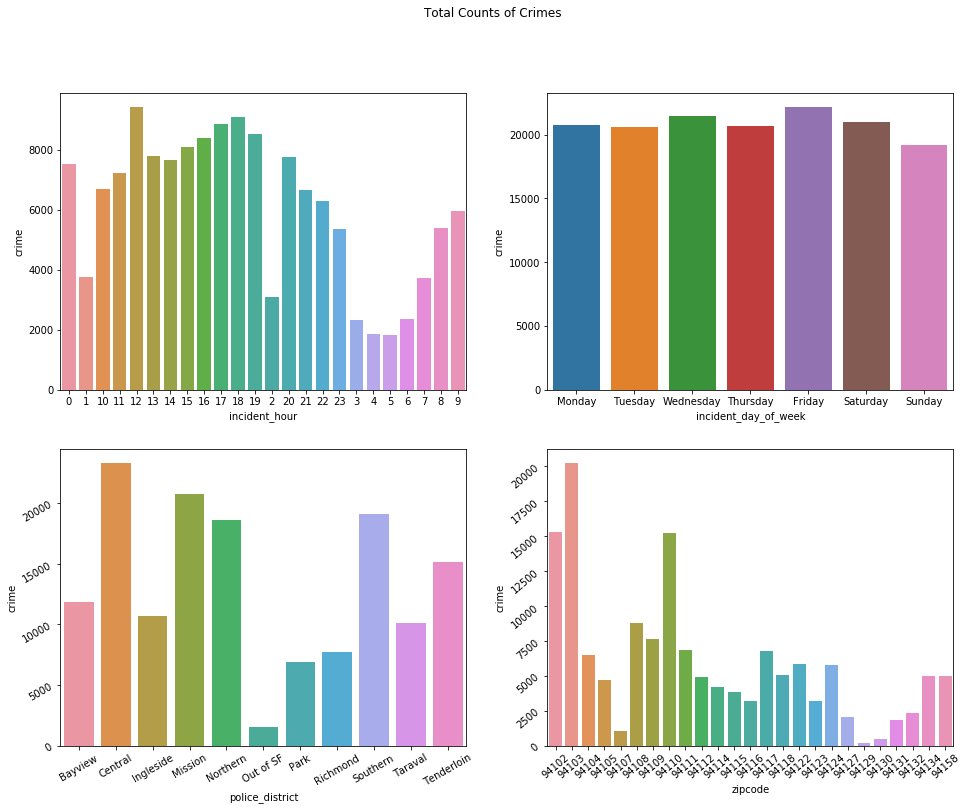

In [13]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fg,ax = plt.subplots(2,2,figsize=(16,12))

x,y = create_counts('incident_day_of_week')
sns.barplot(x,y,ax=ax[0][1],order = order)
x,y = create_counts('incident_hour')
sns.barplot(x,y,ax=ax[0][0])
x,y = create_counts('zipcode')
sns.barplot(x,y,ax=ax[1][1])
x,y = create_counts('police_district')
sns.barplot(x,y,ax=ax[1][0])
ax[1][1].tick_params(labelrotation=40)
ax[1][0].tick_params(labelrotation=30)

fg.suptitle("Total Counts of Crimes")

From the plots above, we observed large differences in the number of crimes across geographical regions as defined by zipcodes and policing districts, as shown in these barplots. The hour of day also seems to matter a lot, with number of crimes peaking from 10 AM to 7 PM. 

/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


ImportError: The descartes package is required for plotting polygons in geopandas. You can install it using 'conda install -c conda-forge descartes' or 'pip install descartes'.

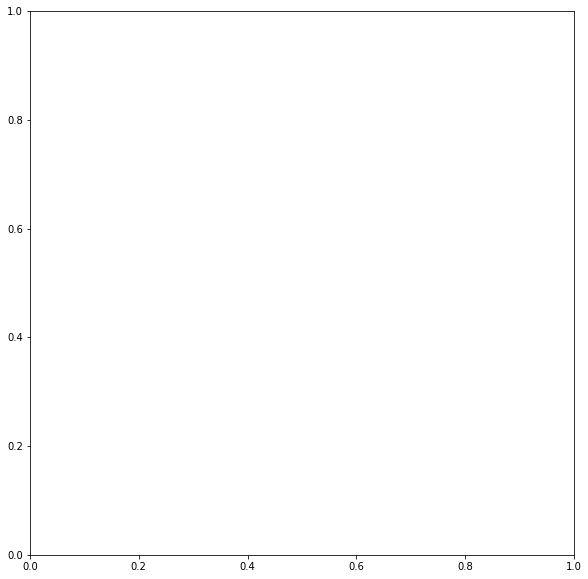

In [14]:
# Crime by zip code
import geopandas
sf = geopandas.read_file('data/zipcodes_geo.json')
sf.crs = {'init': 'epsg:4326'}
sf = sf.set_geometry('geometry')
sf['zip_code'] = sf['zip_code'].astype(np.int32)

df_zip = df.groupby('zipcode')['crime'].sum().reset_index()

chloropleth_data = pd.merge(sf, df_zip, left_on='zip_code', right_on='zipcode', how = 'right')
chloropleth_data = geopandas.GeoDataFrame(chloropleth_data, geometry='geometry')
chloropleth_data.fillna('0')
chloropleth_data.crs = {'init': 'epsg:4326'}
chloropleth_data.plot(column='crime', cmap='OrRd', figsize=(13,10), legend=True)
plt.title("2018 Total Crimes per Zipcode in San Francisco")

In [ ]:
# Zipcode with high crime
df.groupby('zipcode')['crime'].sum().sort_values(ascending=False).head(3)

This plot offers another representation of the total number of crimes in 2018 in each zipcode. Regions with the highest number of crimes are colored in dark red. They include Union Square, the Mission District and Civic center.

In [ ]:
# Crime Heatmap showing number of crime per incident_day_of_week per incident_hour
df_group = df.groupby(['incident_day_of_week', 'incident_hour'])['crime'].sum().reset_index()
heat = pd.pivot_table(df_group, values='crime', index=['incident_day_of_week'],columns=['incident_hour'], aggfunc=np.sum)

sns.heatmap(heat)
plt.title("Crime Heatmap")

Additionally, we noticed an interesting interaction effect between day of week and the hour of incidents in predicting number of crimes. We can see that, aside from the intra-day shift in criminal activity, there is a pretty significant delay in criminal activity during the weekend. This suggest that the patterns in criminal activity changes significantly for both incident day of week and incident hour.   
These exploratory analyses informed our decisions on feature selection down the stream. 


# Section 3: Building a Predictive Policing Model

We will first import our training and testing data and fill the ```NA``` values with median of the column:

In [23]:
df_train = pd.read_csv("data/df_train.csv")
df_test = pd.read_csv("data/df_test.csv")
# Fill NA data with median values of the column
fill_value =  df_train['median_home_value'].dropna().mean()
df_train['median_home_value'] = df_train['median_home_value'].fillna(fill_value)
df_test['median_home_value'] = df_train['median_home_value'].fillna(fill_value)

The predictor variables we choose are the following, for the categorical variable, we have ```incident_day_of_week```, ```incident hour```, ```zipcode```, and ```police_district```. For the continuous variable, we choose ```population```, ```population_density```, ```housing_units```, ```occupied_housing_units```, ```median_home_value```, ```median_household_income```. However, we don't want to include variables that have high colinearity among them, so we compute the Variance Inflation Factor(VIF) for those continuous variables. (VIF is a measure of colinearity among predictor variables within a multiple regression.)


In [24]:
# Check colinearity
cols = ['population','population_density','housing_units',
        'occupied_housing_units','median_home_value','median_household_income']
X_numerical = df_train[cols]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_numerical.values, i) for i in range(X_numerical.shape[1])]
vif["features"] = X_numerical.columns
vif.round(1)

,VIF Factor,features
0,40.2,population
1,10.6,population_density
2,4904.1,housing_units
3,5375.3,occupied_housing_units
4,15.0,median_home_value
5,9.7,median_household_income


We found the variable ```population```, ```housing_units``` and ```occupied_housing_units``` have extremely large VIF, so we will remove them. After that, we normalize the remainng continuous variable and do the one-hot encoding for the categorical variables.


In [25]:
# Use one-hot encoding for categorical variable
X_train_raw = df_train.drop(columns = ['crime'])
X_test_raw = df_test.drop(columns = ['crime'])
X_train_dummy = pd.get_dummies(X_train_raw, 
                               columns = ['incident_day_of_week','incident_hour','zipcode', 'police_district'], 
                               drop_first = True)
X_test_dummy = pd.get_dummies(X_test_raw, 
                               columns = ['incident_day_of_week','incident_hour','zipcode', 'police_district'], 
                               drop_first = True)

In [26]:
# Standardize the numerical columns.
def standardize(df, cols, df_train):
    scalar = StandardScaler().fit(df_train[cols])
    result = df.copy()
    transformed_cols = scalar.transform(result[cols])
    result = result.drop(cols, 1)
    for i in range(len(cols)): 
        col = cols[i]
        result[col] = transformed_cols[:, i]
    return result
cols = ['population','population_density','housing_units',
        'occupied_housing_units','median_home_value','median_household_income']

X_test_clean = standardize(X_test_dummy,cols,X_train_dummy)
X_train_clean = standardize(X_train_dummy,cols,X_train_dummy)

In [30]:
# Dropout columns with huge VIF Factor
X_train_final = X_train_clean.drop(columns=['population','housing_units','occupied_housing_units'])
X_test_final = X_test_clean.drop(columns=['population','housing_units','occupied_housing_units'])

In [28]:
# Get crime data
y_train = df_train['crime'].values
y_test = df_test['crime'].values

For the models, we choose the following common predictive models, the ```linear regression```, ```regularized linear regression```, ```random forest```, ```KNN```, and ```neural networks```.  We use the mean absolute error as the loss function, and the prediction unit is crime per day per hour for each district with different zipcodes. 


In [62]:
# Build models and put them in a dictionary
# Linear regression
linear_regression = sm.OLS(y_train, X_train_final).fit()
# LASSO regression
lam = [0.001,0.01,0.1,1,10]
model_lasso = LassoCV(alphas = lam, max_iter = 100000, 
                      fit_intercept = True, cv = 5).fit(X_train_final,y_train)
#Ridge regression
model_ridge = RidgeCV(alphas = lam,
                      fit_intercept = True,cv = 5).fit(X_train_final,y_train)
# Random Forest
rf = RandomForestRegressor(n_estimators=500, n_jobs=-1).fit(X_train_final,y_train)
# KNN
KNN = KNeighborsRegressor(n_neighbors=10).fit(X_train_final,y_train)
# Neural Network
from tensorflow.keras import layers
validation_split = 0.2
epochs = 50
optimizer = tf.keras.optimizers.RMSprop(1e-3)
model = tf.keras.models.Sequential()
model.add(layers.Dense(units=100, activation='relu', input_dim = X_train_final.shape[1]))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=100, activation='relu'))
model.add(layers.Dense(units=1, activation='relu'))
model.compile(loss = 'mae', optimizer = optimizer)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_final, y_train, batch_size=64, epochs=epochs, 
                    validation_split=validation_split, verbose=0,
                    callbacks=[early_stop])
model_dict = {'linear_regression':linear_regression,
       'LASSO_regression':model_lasso,
       'Ridge_regression':model_ridge,
       'Random_Forest':model,
        'KNN':KNN,
             'Neural_Network':rf}

Text(0.5, 0.98, 'Ground truth vs Model prediction')

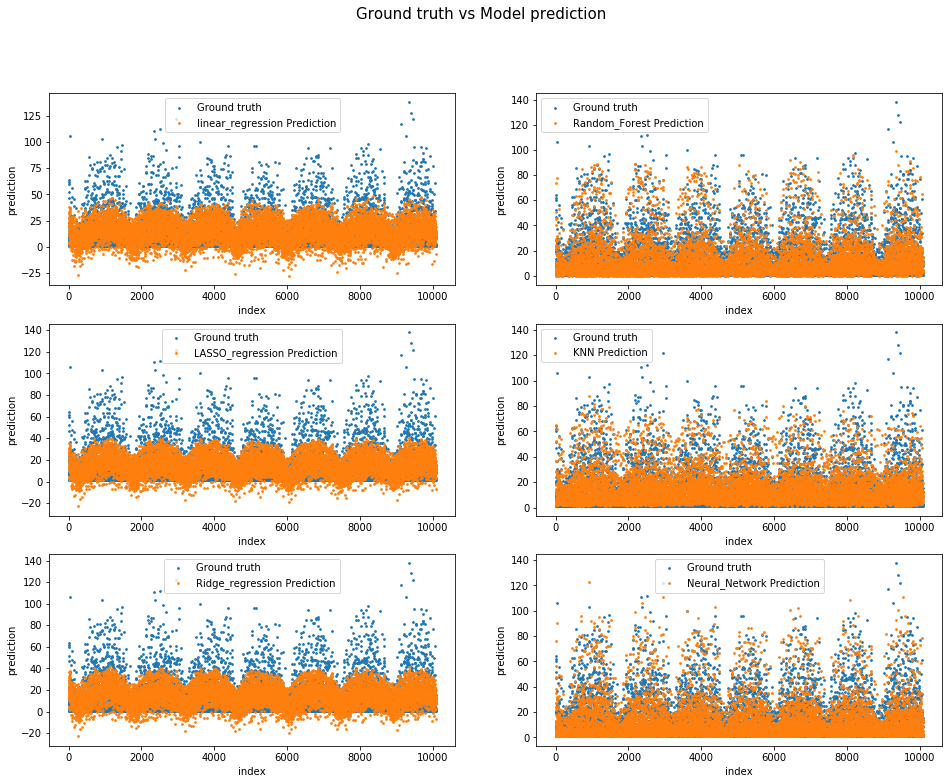

In [63]:
# Visualize the prediction
keys=list(model_dict.keys())
fg,ax = plt.subplots(3,2,figsize=(16,12))
for i in range(0,3):
    model1 = keys[i]
    model2 = keys[i+3]
    ax[i][0].scatter(np.arange(len(y_test)),y_test,label = "Ground truth", s=3)
    label = str(model1)+ " Prediction"
    ax[i][0].scatter(np.arange(len(y_test)),
                     model_dict[model1].predict(X_test_final),label = label, s=3)
    ax[i][0].legend()
    ax[i][0].set_xlabel("index")
    ax[i][0].set_ylabel("prediction")
    ax[i][1].scatter(np.arange(len(y_test)),y_test,label = "Ground truth", s=3)
    label = str(model2)+ " Prediction"
    ax[i][1].scatter(np.arange(len(y_test)),
                     model_dict[model2].predict(X_test_final),label = label, s=3)
    ax[i][1].legend()
    ax[i][1].set_xlabel("index")
    ax[i][1].set_ylabel("prediction")
fg.suptitle("Ground truth vs Model prediction",fontsize = 15)

We will exam and visualize the mean absolute error for each model as well:

Text(0, 0.5, 'MAE')

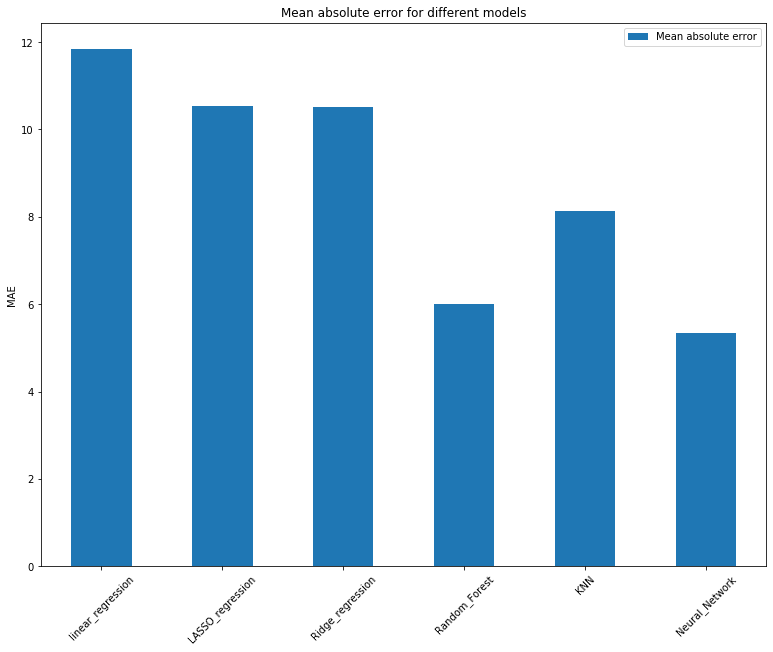

In [100]:
d = model_dict.copy()
for k,v in d.items():
    d[k] = mean_absolute_error(model_dict[k].predict(X_test_final),y_test)
df_error = pd.DataFrame(data =d,index = ["Mean absolute error"]).T
df_error.plot.bar(figsize=(13,10))
plt.xticks(rotation=45)
plt.title("Mean absolute error for different models")
plt.ylabel("MAE")

From the error graph, we can see that there is a trade of between interpretability and accuracy. We have reached an error as low as 5.3 for the neural network model but we’ve also reached the point where there’s no way to explain how we get the results that we do. This is where data science can become very dangerous if we are affecting people’s lives and can’t explain why. If we made a mistake, or if we introduced our biases into the model, the model is pretty much a black box. Although there are many more methods we can use to improve models like using more input variables, tune hyper-parameters or using more data in previous years, we want to get the best possible model with the least amount of effort. We want to show how easy it really is to make these predictions, and how quickly we lose explainability. 


# Section 4: Simulation Study

In this section, we want to show that bias will exacerbate with accurate models through a simulation and will showcase the danger of misusing such models and simplying sending more policeto areas with high crime is a bad idea. 

We have made the following assumptions: 
1. Each district has 20 police in 2018.
2. In 2019, Police office will send more police in proportion of number of crimes happened.
3. On average, each police has the same ability of finding crimes.

[Text(0, 0, '94102.0'),
 Text(0, 0, '94103.0'),
 Text(0, 0, '94104.0'),
 Text(0, 0, '94105.0'),
 Text(0, 0, '94107.0'),
 Text(0, 0, '94108.0'),
 Text(0, 0, '94109.0'),
 Text(0, 0, '94110.0'),
 Text(0, 0, '94111.0'),
 Text(0, 0, '94112.0'),
 Text(0, 0, '94114.0'),
 Text(0, 0, '94115.0'),
 Text(0, 0, '94116.0'),
 Text(0, 0, '94117.0'),
 Text(0, 0, '94118.0'),
 Text(0, 0, '94122.0'),
 Text(0, 0, '94123.0'),
 Text(0, 0, '94124.0'),
 Text(0, 0, '94127.0'),
 Text(0, 0, '94129.0'),
 Text(0, 0, '94130.0'),
 Text(0, 0, '94131.0'),
 Text(0, 0, '94132.0'),
 Text(0, 0, '94134.0'),
 Text(0, 0, '94158.0')]

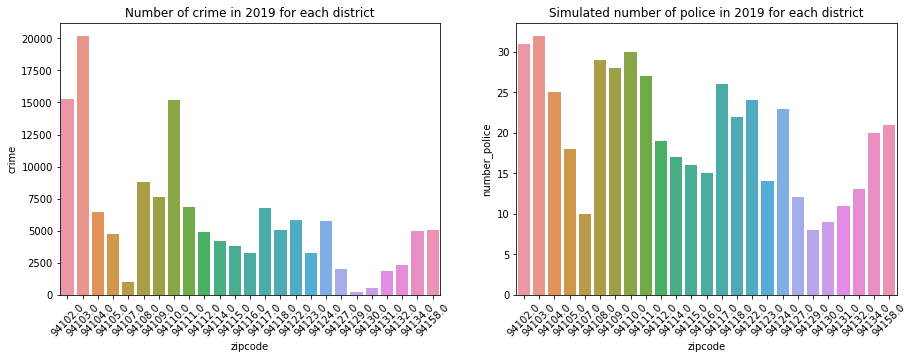

In [89]:
Orig_df = df_train.copy()
Orig_df  = Orig_df.groupby(by=['zipcode'],
                       as_index= False).agg({'crime':'sum'}).sort_values('crime', ascending = False)
adjust = np.array([12,11,10,9,8,7,6,5,4,3,2,1,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12])
Orig_df ['adjustment'] = adjust
total_num = np.array([20 for i in range(0,25)])+adjust
Orig_df ['number_police'] = total_num
fg,ax = plt.subplots(1,2,figsize=(15,5))
xlabels = Orig_df.sort_index()['zipcode']
sns.barplot(x="zipcode", y="crime", ax=ax[0],data=Orig_df)
ax[0].set_title("Number of crime in 2019 for each district")
ax[0].set_xticklabels(xlabels,rotation=45)
sns.barplot(x="zipcode", y="number_police", ax=ax[1],data=Orig_df)
ax[1].set_title("Simulated number of police in 2019 for each district")
ax[1].set_xticklabels(xlabels,rotation=45)

The first graph above illustrates that crime numbers vary a lot among different districts, and we make the adjustment on number of police based on the number of crimes. The second graph above illustrate that the simulated number of polices in each district. They are no longer uniform as in 2018 (In 2018, we assume each district has 20 police).


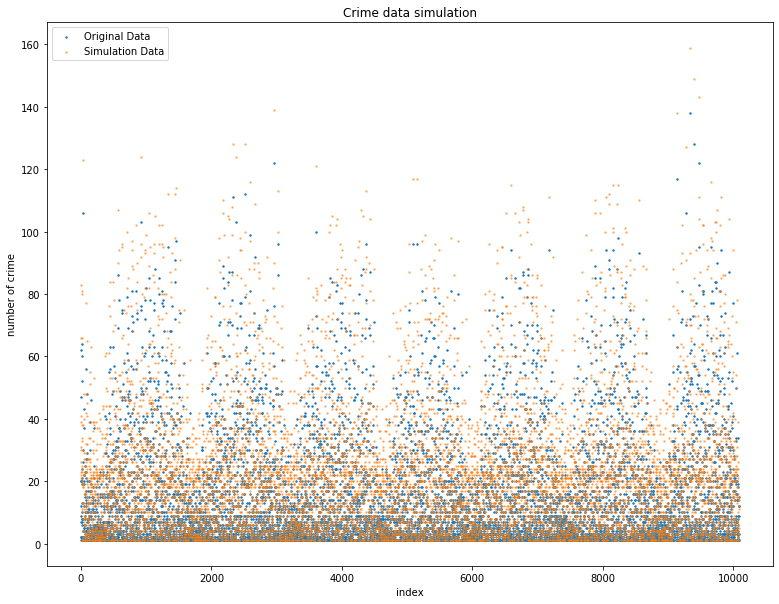

In [101]:
# Simulated number of crimes in 2019.
plt.figure(figsize = (13,10))
police_ability = np.mean(Orig_df ['crime']/52/24/7/20)
df_adjust = Orig_df[['zipcode','adjustment']]
dict_adjust = df_adjust.set_index('zipcode').to_dict()['adjustment']
y_adjustment =  round(df_test['zipcode'].apply(lambda x:dict_adjust[x])*police_ability*52,0)
def ReLU(x):
    return x * (x > 0)
y_simulation = ReLU(y_adjustment)+y_test
plt.scatter(x=np.arange(len(y_simulation)),y= y_test,label = "Original Data",s =2)
plt.scatter(x=np.arange(len(y_simulation)),y= y_simulation,label = "Simulation Data",s=2,alpha = 0.5)
plt.xlabel("index")
plt.ylabel("number of crime")
plt.title("Crime data simulation")
plt.legend()

You can tell that the spread of number of crimes are wider for the simulated data from the above figure.

Next, we retrain the Neural network model using simulated data, and make prediction on number of crimes for each district in 2020. 

In [110]:
# Get 2020 data
df = pd.read_csv('data/clean_police_reports.csv')
df['crime'] = 1
df_2020 = df[df['incident_year'] == 2020].copy()
predictors = ['incident_day_of_week', 'incident_month', 'incident_day', 
              'incident_hour', 'zipcode','police_district']
target = ['crime']
df_2020 = df_2020[predictors+target]
# Produce crime counts per police_district per day of week + hour
group_by_cols = ['incident_day_of_week', 'incident_hour', 'zipcode','police_district']
info_cols = ['zipcode', 'population', 'population_density', 'housing_units',
             'occupied_housing_units', 'median_home_value', 'median_household_income']
df_2020_group = df_2020.groupby(group_by_cols)['crime'].sum().reset_index()
df_zip_info = df[info_cols].drop_duplicates()
df_2020_group = pd.merge(df_2020_group, df_zip_info, on = 'zipcode', how = 'left')
X_2020 = df_2020_group.drop(columns = ['crime'])
X_2020_dummy = pd.get_dummies(X_2020, 
                               columns = ['incident_day_of_week','incident_hour',
                                          'zipcode','police_district'], 
                               drop_first = True)
# Standardize the numerical columns.
X_2020_clean = standardize(X_2020_dummy,cols,X_test_dummy)
X_2020_final = X_2020_clean.drop(columns=['population','housing_units',
                                          'occupied_housing_units'])

In [111]:
# Retrain the model
validation_split = 0.2
epochs = 50
optimizer = tf.keras.optimizers.RMSprop(5e-4)
model = tf.keras.models.Sequential()
model.add(layers.Dense(units=100, activation='relu', input_dim = X_train_final.shape[1]))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=100, activation='relu'))
model.add(layers.Dense(units=1, activation='relu'))
model.compile(loss = 'mae', optimizer = optimizer)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_test_final, y_simulation, batch_size=64, epochs=epochs, 
                    validation_split=validation_split, verbose=0,
                    callbacks=[early_stop])
# Check the average crime per week for each district through the year.
y_pred_2020 = model.predict(X_2020_final)/4

Visualize the simulation result:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

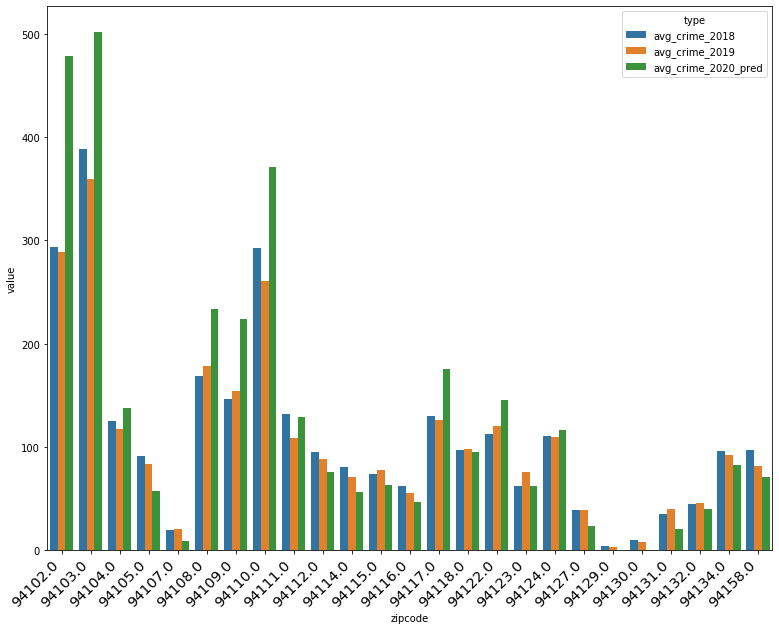

In [112]:
df_2018 = df_train.copy()
df_2018 = df_2018.groupby(by=['zipcode'],
                       as_index= False).agg({'crime':'sum'})
df_2019 = df_test.copy()
df_2019['simulated_crime'] = y_simulation
df_2019_orig = df_2019.groupby(by=['zipcode'],
                       as_index= False).agg({'crime':'sum'})
df_2019_sim = df_2019.groupby(by=['zipcode'],
                       as_index= False).agg({'simulated_crime':'sum'})
df_2020 = df_2020_group.copy()
df_2020['crime'] = y_pred_2020
df_2020 = df_2020.groupby(by=['zipcode'],
                       as_index= False).agg({'crime':'sum'})
Total_df = df_2018.copy().drop('crime',1)
Total_df['avg_crime_2018'] = df_2018['crime']/52
Total_df['avg_crime_2019'] = df_2019_orig['crime']/52
Total_df['avg_crime_2019_sim'] = df_2019_sim['simulated_crime']/52
Total_df['avg_crime_2020_pred'] = df_2020['crime']/13
Total_df["zipcode"] = Total_df["zipcode"].astype('category')
plt.figure(figsize=(13,10))
def gather( df, key, value, cols ):
    id_vars = [ col for col in df.columns if col not in cols ]
    id_values = cols
    var_name = key
    value_name = value
    return pd.melt( df, id_vars, id_values, var_name, value_name )
Total_df_plot = gather(Total_df,'type','value',['avg_crime_2018','avg_crime_2019','avg_crime_2020_pred'])
chart = sns.barplot(x="zipcode", hue="type", y="value", data=Total_df_plot)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')

We see that number of crimes increases in the area that has higher number of crimes before and number of crimes decreases in the area that has lower number of crimes before. If we start sending more police to the areas where we predict to have more crime, the police will find crime. However, if we start sending more police anywhere, they will also find more crime. This is simply a result of having more police in any given area trying to find crime. This means that our model could be off, but it will always appear right. If police already frequent a neighborhood and search people because of their inherent racial bias, they will already have found more crime. This will mean the model will send them there again and again, and will become a self-fulfilling prophecy.


# Section 5: Conclusion and Recommendation

From above sections, we have seen how accurate predictive models may exacerbate bias in the data set. However, our work has several limitations: 
- we did not differentiate between crimes that can be deterred (# crime would decrease) versus those that can be discorvered. I.e. our assumptions for the simulation might only holds for crimes that neet police to take initiatives(drugs, traffic violation etc.)
- We did not consider adversarial response, i.e. criminal activities might shift as they adjust their behavior based on their own observations of policing activities and patrol routes.   

Our conclusions center on advice to two communities: police departments and developers. Our advice centers on the role of predictive policing in the larger context of law enforcement operations.

### Advice for Law Enforcement Agencies
All departments can benefit from predictive policing methods and tools; the distinction is in how sophisticated (and expensive) these tools need to be. In thinking about these needs, it is important to remember that the value of predictive policing tools is in their ability to provide situational awareness of crime risks and the information needed to act on those risks and preempt crime. 

Small agencies with relatively few crimes per year and with reasonably understandable distributions of crime are unlikely to need much more than core statistical and display capabilities. These tools are available for free or at low cost and include built- in capabilities in Microsoft Office, basic geographic information tools, base statistics packages, and perhaps some advanced visualization tools, such as the National Institute of Justice sponsored CrimeStat series.

Larger agencies with large volumes of incident and intelligence data that need to be analyzed and shared will want to consider more sophisticated and, therefore, more costly systems. It is helpful to think of these as enterprise information technology sys- tems that make sense of large data sets to provide situational awareness across a depart- ment (extending, in many cases, to the public). These systems should help agencies understand the where, when, and who of crime and identify the specific problems that drive crime in order to take action against them. Key considerations include interoperability with the department’s records management, computer-aided dispatch, and other systems and the types of analyses and predictions the system can support and under what conditions.

### Advice for Developers

we think that predictive policing tools and methods are very useful, but they are not crystal balls. Media reports and advertisements can give an impression that one merely needs to ask a computer where and when to go to catch criminals in the act. We need to be accurate in describing our systems as identifying crime risks, not foretelling the future. 
